<a href="https://colab.research.google.com/github/dr-mushtaq/Deep-Learning/blob/master/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course 1: Neural Networks and Deep Learning**

##**📚Chapter2: Logistic Regression as a Neural Network**

### **Gradient Descent on m Examples**

In [ ]:
import numpy as np

def gradient_descent(X, y, learning_rate, num_iterations):
    """
    Performs gradient descent to minimize the MSE loss function for a linear regression model.

    Args:
        X (np.ndarray): The training data features.
        y (np.ndarray): The training data labels.
        learning_rate (float): The learning rate.
        num_iterations (int): The number of iterations to perform.

    Returns:
        np.ndarray: The optimal weights.
    """
    weights = np.zeros(X.shape[1])

    for _ in range(num_iterations):
        predictions = np.dot(X, weights)
        errors = predictions - y
        gradients = np.dot(errors.T, X).T

        weights -= learning_rate * gradients

    return weights


In [ ]:
# Generate some synthetic data
X = np.random.randn(100, 2)
y = 2 * X[:, 0] + 1 + np.random.randn(100)

In [ ]:
# Train the linear regression model using gradient descent
weights = gradient_descent(X, y, 0.01, 1000)

print("Optimal weights:", weights)

Optimal weights: [ 1.62817141 -0.14618265]


## 📚**Chapter3: Python and Vectorization**

## **Vectorizing Logistic Regression**

In [ ]:
import numpy as np
from scipy.special import expit  # sigmoid function
#2- Define Data:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])  # features
y = np.array([0, 1, 1, 0])  # labels
#3. Initialize Theta:
theta = np.zeros(X.shape[1])  # initialize weights with zeros

In [ ]:
#4. Define Functions:
def sigmoid(z):
    return expit(z)

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

def cost_function(X, y, theta, lambda_reg=0):
    m = X.shape[0]
    predictions = hypothesis(X, theta)
    cost = -(1.0 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    reg_cost = (lambda_reg / (2 * m)) * np.sum(np.power(theta[1:], 2))
    return cost + reg_cost

def gradient_descent(X, y, theta, alpha, lambda_reg=0):
    m = X.shape[0]
    predictions = hypothesis(X, theta)
    dz = predictions - y
    dw = (1.0 / m) * np.dot(X.T, dz)
    dw[1:] += (lambda_reg / m) * theta[1:]

In [ ]:
#5. Training Loop:
alpha = 0.1  # learning rate
lambda_reg = 0.1  # regularization parameter
iterations = 1000

In [ ]:
for _ in range(iterations):
    gradient = gradient_descent(X, y, theta, alpha, lambda_reg)
    theta -= alpha * gradient

print("Final Theta:", theta)

Final Theta: [0. 0.]


# **Course 2: Improving Deep Neural Networks**

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Chapter 1: Practical Aspects of Deep Learning**</p>

### **Regularization**

**Regularization in Logistic Regression**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target
X = X[y != 2]  # Use only two classes for binary classification
y = y[y != 2]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without regularization
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy without regularization:", accuracy_score(y_test, y_pred))

# Logistic Regression with L2 regularization
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy with L2 regularization:", accuracy_score(y_test, y_pred))


Accuracy without regularization: 1.0
Accuracy with L2 regularization: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


**Role of Lambda in Regularization**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search to find the best lambda (C in scikit-learn, where C = 1/lambda)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameter (C):", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameter (C): {'C': 0.01}
Best cross-validation score: 1.0


**L2 Regularization for Neural Networks**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Create a simple neural network with L2 regularization
model = Sequential([
    Dense(64, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/100
8/8 [==============================] - 2s 42ms/step - loss: 1.6262 - accuracy: 0.4750 - val_loss: 1.3614 - val_accuracy: 0.6000
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 1.3007 - accuracy: 0.6250 - val_loss: 1.2801 - val_accuracy: 0.4000
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 1.1785 - accuracy: 0.5500 - val_loss: 1.1300 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.9500 - val_loss: 0.9676 - val_accuracy: 1.0000
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.9460 - accuracy: 1.0000 - val_loss: 0.8748 - val_accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8398 - accuracy: 1.0000 - val_loss: 0.7742 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.7476 - accuracy: 1.0000 - val_loss: 0.6865 - val_accuracy: 1.0000
Epoch 8/100
8/8 [======

### **Dropout Regularization**

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten the input image
model.add(Dense(512, activation='relu'))  # Fully connected layer with 512 units
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(512, activation='relu'))  # Another fully connected layer with 512 units
model.add(Dropout(0.5))  # Another dropout layer with 50% dropout rate
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (one for each class)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8107 - loss: 0.5970 - val_accuracy: 0.9605 - val_loss: 0.1309
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9497 - loss: 0.1672 - val_accuracy: 0.9722 - val_loss: 0.0918
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9606 - loss: 0.1260 - val_accuracy: 0.9742 - val_loss: 0.0794
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9678 - loss: 0.1063 - val_accuracy: 0.9775 - val_loss: 0.0734
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9709 - loss: 0.0934 - val_accuracy: 0.9772 - val_loss: 0.0693
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9726 - loss: 0.0835 - val_accuracy: 0.9796 - val_loss: 0.0660
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9772 - loss: 0.0740 - val_accuracy: 0.9772 - val_loss: 0.0703
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9779 - loss: 0.0724 - val_

### **Other Regularization Methods**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen.fit(x_train)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 124ms/step - accuracy: 0.2498 - loss: 2.0027 - val_accuracy: 0.4295 - val_loss: 1.6068
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.3858 - loss: 1.6825 - val_accuracy: 0.5037 - val_loss: 1.3678
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 120ms/step - accuracy: 0.4308 - loss: 1.5696 - val_accuracy: 0.5493 - val_loss: 1.2456
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 116ms/step - accuracy: 0.4567 - loss: 1.5131 - val_accuracy: 0.5528 - val_loss: 1.2435
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.4721 - loss: 1.4637 - val_accuracy: 0.5337 - val_loss: 1.3389
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 115ms/step - accuracy: 0.4836 - loss: 1.4295 - val_accuracy: 0.5787 - val_loss: 1.1794
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.4985 - loss: 1.4083 - val_accuracy: 0.6251 - val_loss: 1.0693
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 117ms/step - accuracy: 0.5031 - loss: 1.3865

### **Numerical Approximation of Gradients**

In [ ]:
import numpy as np

# Generate synthetic data: house size (x) and price (y)
np.random.seed(0)
x = 2 * np.random.rand(100, 1)  # house size (100 houses)
y = 4 + 3 * x + np.random.randn(100, 1)  # house price with some noise

# Initialize weights and bias
w = np.random.randn(1)  # weight
b = np.random.randn(1)  # bias

# Define learning rate and epsilon for gradient checking
learning_rate = 0.01
epsilon = 1e-4

# Define the model function y = w * x + b
def predict(x, w, b):
    return w * x + b

# Define the loss function (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Compute gradients for w and b (theoretical gradients)
def compute_gradients(x, y, y_pred, w, b):
    m = len(x)
    dw = (2/m) * np.sum((y_pred - y) * x)
    db = (2/m) * np.sum(y_pred - y)
    return dw, db

# Numerical approximation of gradients using two-sided difference formula
def numerical_gradient(x, y, w, b, epsilon, param='w'):
    if param == 'w':
        w_plus = w + epsilon
        w_minus = w - epsilon
        loss_plus = compute_loss(y, predict(x, w_plus, b))
        loss_minus = compute_loss(y, predict(x, w_minus, b))
        return (loss_plus - loss_minus) / (2 * epsilon)
    elif param == 'b':
        b_plus = b + epsilon
        b_minus = b - epsilon
        loss_plus = compute_loss(y, predict(x, w, b_plus))
        loss_minus = compute_loss(y, predict(x, w, b_minus))
        return (loss_plus - loss_minus) / (2 * epsilon)

# Perform one step of gradient descent and gradient checking
y_pred = predict(x, w, b)
loss = compute_loss(y, y_pred)

# Theoretical gradients
dw_theoretical, db_theoretical = compute_gradients(x, y, y_pred, w, b)

# Numerical gradients
dw_numerical = numerical_gradient(x, y, w, b, epsilon, param='w')
db_numerical = numerical_gradient(x, y, w, b, epsilon, param='b')

# Print the results for comparison
print(f"Theoretical gradient for w: {dw_theoretical}")
print(f"Numerical gradient for w: {dw_numerical}")
print(f"Theoretical gradient for b: {db_theoretical}")
print(f"Numerical gradient for b: {db_numerical}")

# Ensure the theoretical and numerical gradients are close
assert np.isclose(dw_theoretical, dw_numerical, atol=1e-5), "Gradients for w don't match!"
assert np.isclose(db_theoretical, db_numerical, atol=1e-5), "Gradients for b don't match!"


Theoretical gradient for w: -18.735813085036366
Numerical gradient for w: -18.735813085015707
Theoretical gradient for b: -17.477561911002848
Numerical gradient for b: -17.47756191100791


### **Gradient Checking**

In [ ]:
import numpy as np

# Define a simple cost function J(θ) = θ^2
def cost_function(theta):
    return theta ** 2

# Analytical gradient dJ/dθ = 2θ
def analytical_gradient(theta):
    return 2 * theta

# Numerical gradient using two-sided difference approximation
def numerical_gradient(theta, epsilon=1e-7):
    return (cost_function(theta + epsilon) - cost_function(theta - epsilon)) / (2 * epsilon)

# Function to perform gradient checking
def gradient_check(theta, epsilon=1e-7):
    # Calculate both the analytical and numerical gradients
    analytical_grad = analytical_gradient(theta)
    numerical_grad = numerical_gradient(theta, epsilon)

    # Compare them
    diff = np.abs(analytical_grad - numerical_grad)
    if diff < 1e-7:
        print(f"Gradient check passed! Difference: {diff}")
    else:
        print(f"Gradient check failed! Difference: {diff}")

# Test the gradient check with a value of θ
theta_value = 1.5
gradient_check(theta_value)

Gradient check passed! Difference: 1.7516015304863686e-09


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Chapter 2:Optimization Algorithms**</p>

### **SGD with Momentum**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the Neural Network
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 image
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Configuring SGD Optimizer with Momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the Model
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the Model
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8209 - loss: 0.5678
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9528 - loss: 0.1546
Epoch 3/10


### **RMSprop**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the Neural Network
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 image
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Configuring RMSprop Optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

# Compile the Model
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the Model
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8613 - loss: 0.4816
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9566 - loss: 0.1492
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9692 - loss: 0.1073
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9732 - loss: 0.0898
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9769 - loss: 0.0774
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9813 - loss: 0.0670
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9832 - loss: 0.0592
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9842 - loss: 0.0542
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9862 - loss: 0.0492
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9875 - loss: 0.0446


### **-Adam Optimization Algorithm**

**5. Training the Model:**



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Building the Neural Network:
# Change input shape to match MNIST image shape (28, 28, 1)
# Add a Flatten layer to convert the image to a 1D vector
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)), # Flatten the 28x28 image
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Configuring Adam Optimizer:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Compiling the Model:
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Training the Model:
model.fit(x_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8511 - loss: 0.5126
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9598 - loss: 0.1403
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9702 - loss: 0.0995
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9774 - loss: 0.0761
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9798 - loss: 0.0634
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9835 - loss: 0.0520
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9869 - loss: 0.0441
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9882 - loss: 0.0372
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9907 - loss: 0.0306
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9912 - loss: 0.0288


### **Learning Rate Decay**

Epoch 01: x = 1.2000, Loss = 3.2400, LR = 0.2000
Epoch 02: x = 1.8545, Loss = 1.3121, LR = 0.1818
Epoch 03: x = 2.2364, Loss = 0.5831, LR = 0.1667
Epoch 04: x = 2.4713, Loss = 0.2795, LR = 0.1538
Epoch 05: x = 2.6224, Loss = 0.1426, LR = 0.1429
Epoch 06: x = 2.7231, Loss = 0.0767, LR = 0.1333
Epoch 07: x = 2.7923, Loss = 0.0431, LR = 0.1250
Epoch 08: x = 2.8412, Loss = 0.0252, LR = 0.1176
Epoch 09: x = 2.8765, Loss = 0.0153, LR = 0.1111
Epoch 10: x = 2.9025, Loss = 0.0095, LR = 0.1053
Epoch 11: x = 2.9220, Loss = 0.0061, LR = 0.1000
Epoch 12: x = 2.9368, Loss = 0.0040, LR = 0.0952
Epoch 13: x = 2.9483, Loss = 0.0027, LR = 0.0909
Epoch 14: x = 2.9573, Loss = 0.0018, LR = 0.0870
Epoch 15: x = 2.9644, Loss = 0.0013, LR = 0.0833
Epoch 16: x = 2.9701, Loss = 0.0009, LR = 0.0800
Epoch 17: x = 2.9747, Loss = 0.0006, LR = 0.0769
Epoch 18: x = 2.9785, Loss = 0.0005, LR = 0.0741
Epoch 19: x = 2.9815, Loss = 0.0003, LR = 0.0714
Epoch 20: x = 2.9841, Loss = 0.0003, LR = 0.0690
Epoch 21: x = 2.9862

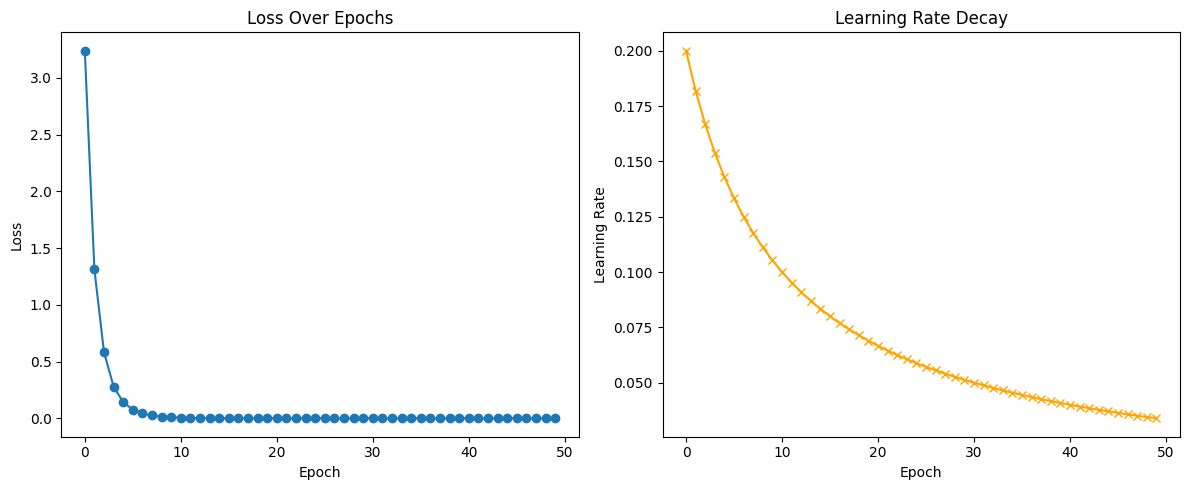

In [ ]:
import matplotlib.pyplot as plt

# Objective function: f(x) = (x - 3)^2
def loss_function(x):
    return (x - 3) ** 2

# Gradient of the loss function: f'(x) = 2(x - 3)
def gradient(x):
    return 2 * (x - 3)

# Hyperparameters
initial_lr = 0.2          # Initial learning rate (alpha_0)
decay_rate = 0.1          # Decay rate
epochs = 50               # Number of training iterations
x = 0                     # Initial value of x

# Store values for visualization
x_values = []
loss_values = []
lr_values = []

# Training loop
for epoch in range(epochs):
    lr = initial_lr / (1 + decay_rate * epoch)  # Apply learning rate decay
    grad = gradient(x)
    x = x - lr * grad  # Gradient descent update

    # Track values
    x_values.append(x)
    loss_values.append(loss_function(x))
    lr_values.append(lr)

    print(f"Epoch {epoch+1:02d}: x = {x:.4f}, Loss = {loss_function(x):.4f}, LR = {lr:.4f}")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_values, marker='o')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(range(epochs), lr_values, marker='x', color='orange')
plt.title("Learning Rate Decay")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")

plt.tight_layout()
plt.show()


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Chapter 3:Hyperparameter tunning , Batch Normalization and Programming Frameworks**</p>

###**Quick Python Example: Log-Scale Sampling for Learning Rate**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the data
X, y = load_iris(return_X_y=True)

# Sample 5 learning rates on a log scale from 1e-4 to 1
def sample_log_uniform(a=-4, b=0, size=5):
    r = np.random.uniform(a, b, size)
    return 10 ** r

learning_rates = sample_log_uniform()
print("Sampled learning rates:", learning_rates)

# Evaluate each learning rate
for lr in learning_rates:
    model = LogisticRegression(C=1/lr, max_iter=200)
    scores = cross_val_score(model, X, y, cv=5)
    print(f"α = {lr:.1e}, Accuracy = {scores.mean():.3f}")


Sampled learning rates: [4.81111034e-03 7.25901464e-01 3.36479181e-01 1.55438260e-04
 2.43092902e-01]
α = 4.8e-03, Accuracy = 0.973
α = 7.3e-01, Accuracy = 0.973
α = 3.4e-01, Accuracy = 0.973
α = 1.6e-04, Accuracy = 0.973
α = 2.4e-01, Accuracy = 0.973


### **Normalizing Activations in a Network**

Let’s see how normalization affects training using a built-in dataset and a simple neural network with and without batch normalization.

In [ ]:
# Import required libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU
from tensorflow.keras.utils import to_categorical

# Load dataset
digits = load_digits()
X = digits.data
y = to_categorical(digits.target)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a model with Batch Normalization
model = Sequential([
    Dense(64, input_shape=(64,)),
    BatchNormalization(),  # Apply batch normalization after the layer
    ReLU(),                # Then apply activation
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


🔍 What to Observe

You’ll notice that training becomes more stable, often faster, and reaches better accuracy compared to a model without BatchNormalization().

# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**References**</p>



1.   [Understand Deep Learning](https://udlbook.github.io/udlbook/)
2.   List item

